# ISTANBUL AIRBNB DATA ANALYSIS, SEP 2024 

# 1. Data Exploration

In this project, we will examine the data and answer the questions below, as well as explore further areas through deeper analysis.

1. What are the popular districts for airbnb rent in Istanbul? Are they the touristic districts?
2. What is the proportion of districts for each room type?
3. What are the top districts for review value score?

# 2. Data Preparation

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ist_24 = pd.read_csv('airbnb_list_24.csv')
ist_24.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,25436,In the forest Sea view Two minutes to the city.,105823,Yesim,NaN,Besiktas,41.078830,29.038630,Entire home/apt,NaN,7,0,NaN,NaN,1,0,0,NaN
1,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.091040,29.055800,Entire home/apt,4108.0,3,0,NaN,NaN,1,88,0,NaN
2,607344,Blue Suites by V 2 Sultanahmet,2751565,Volkan,NaN,Fatih,41.005190,28.979070,Entire home/apt,3522.0,2,61,2024-06-25,0.44,3,329,5,Exempt
3,34177,PETIT HOUSE,147330,Ercan,NaN,Besiktas,41.066810,29.040350,Entire home/apt,1315.0,10,16,2024-01-03,0.15,2,185,2,NaN
4,610010,nicely decorated central flat at Nişantaşı,3017457,Zeynep,NaN,Sisli,41.054108,28.992821,Entire home/apt,NaN,1,0,NaN,NaN,1,362,0,NaN


In [3]:
ist_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31758 entries, 0 to 31757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31758 non-null  int64  
 1   name                            31758 non-null  object 
 2   host_id                         31758 non-null  int64  
 3   host_name                       31758 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   31758 non-null  object 
 6   latitude                        31758 non-null  float64
 7   longitude                       31758 non-null  float64
 8   room_type                       31758 non-null  object 
 9   price                           29232 non-null  float64
 10  minimum_nights                  31758 non-null  int64  
 11  number_of_reviews               31758 non-null  int64  
 12  last_review                     

So we read the data first using the pandas library and as we can see data has 17 columns along with uniqe features like(id, name),  host information(host id, host_name) and environment details (neighbourhod group and itself, latitude, longtitude) , room type, price and etc. 

In [4]:
ist_24.duplicated().sum()

0

In [5]:
ist_24.drop_duplicates(subset = ['id'], inplace = True)

Checking for the duplicates and if there's any dropping them off

In [6]:
ist_24.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               31758
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              2526
minimum_nights                        0
number_of_reviews                     0
last_review                       12356
reviews_per_month                 12356
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           21420
dtype: int64

Next we're checking for missing values for columns and as we can see above here's come missing values in neighbourhood_group, price, last_review, reviews_per_month, license. Simply saying we can just get rid off these missing values as long as we're not gonna be in need to use them for our analysis. We just leave the column price 

In [7]:
ist_24 = ist_24.drop(['neighbourhood_group', 'last_review', 'reviews_per_month', 'license'], axis = 1)

So the next step is gonna be getting the detailed listing dataset and merging it with the summary one because we have some needed information from detailed listing dataset.

In [9]:
ist_24_detailed = pd.read_csv('airbnb_list_24_detailed.csv')
print(ist_24_detailed.shape)
ist_24_detailed.head()

(31758, 75)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,25436,https://www.airbnb.com/rooms/25436,20240630022825,2024-06-30,previous scrape,In the forest Sea view Two minutes to the city.,Our house is in Bebek Koru. If you want villag...,Clean and elegand friends . U can find everyth...,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,28318,https://www.airbnb.com/rooms/28318,20240630022825,2024-06-30,city scrape,Cosy home overlooking Bosphorus,NaN,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,607344,https://www.airbnb.com/rooms/607344,20240630022825,2024-06-30,city scrape,Blue Suites by V 2 Sultanahmet,The best place you can stay in the very heart ...,The location is the very heart of the center o...,https://a0.muscache.com/pictures/7972946/68fdf...,2751565,...,5.00,5.00,4.82,Exempt,t,3,3,0,0,0.44
3,610010,https://www.airbnb.com/rooms/610010,20240630022825,2024-06-30,previous scrape,nicely decorated central flat at Nişantaşı,"A comfortable, cosy, nicely decorated flat si...",Nişantaşı,https://a0.muscache.com/pictures/miso/Hosting-...,3017457,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,34177,https://www.airbnb.com/rooms/34177,20240630022825,2024-06-30,city scrape,PETIT HOUSE,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,...,4.81,4.69,4.81,NaN,f,2,2,0,0,0.15


In [10]:
ist_24_detailed.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [11]:
ist_24 = ist_24.merge(ist_24_detailed[["id","description",'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']], on = 'id', how = 'left')
ist_24.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,number_of_reviews_ltm,description,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,25436,In the forest Sea view Two minutes to the city.,105823,Yesim,Besiktas,41.078830,29.038630,Entire home/apt,NaN,7,...,0,0,Our house is in Bebek Koru. If you want villag...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28318,Cosy home overlooking Bosphorus,121721,Aydin,Sariyer,41.091040,29.055800,Entire home/apt,4108.0,3,...,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,607344,Blue Suites by V 2 Sultanahmet,2751565,Volkan,Fatih,41.005190,28.979070,Entire home/apt,3522.0,2,...,329,5,The best place you can stay in the very heart ...,4.89,4.90,4.95,4.98,5.00,5.00,4.82
3,34177,PETIT HOUSE,147330,Ercan,Besiktas,41.066810,29.040350,Entire home/apt,1315.0,10,...,185,2,My petit house is located in the bosphorous an...,4.69,4.69,4.88,4.88,4.81,4.69,4.81
4,610010,nicely decorated central flat at Nişantaşı,3017457,Zeynep,Sisli,41.054108,28.992821,Entire home/apt,NaN,1,...,362,0,"A comfortable, cosy, nicely decorated flat si...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ist_24.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31758 entries, 0 to 31757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31758 non-null  int64  
 1   name                            31758 non-null  object 
 2   host_id                         31758 non-null  int64  
 3   host_name                       31758 non-null  object 
 4   neighbourhood                   31758 non-null  object 
 5   latitude                        31758 non-null  float64
 6   longitude                       31758 non-null  float64
 7   room_type                       31758 non-null  object 
 8   price                           29232 non-null  float64
 9   minimum_nights                  31758 non-null  int64  
 10  number_of_reviews               31758 non-null  int64  
 11  calculated_host_listings_count  31758 non-null  int64  
 12  availability_365                

# 3 Data analysis

### What are the popular districts for airbnb rent in Istanbul? Are they the touristic districts?

In [14]:
ist_24.groupby('neighbourhood').agg({'id':'count'}).sort_values(by = ['id'], ascending = False).head(10)

,id
neighbourhood,
Beyoglu,7728
Sisli,4393
Fatih,3862
Kadikoy,2546
Besiktas,1880
Esenyurt,1256
Uskudar,877
Bahcelievler,860
Kagithane,859


In [17]:
top5_neigh__total_list = ist_24.groupby('neighbourhood').agg({'id':'count'}).sort_values(by = ['id'], ascending = False).head(5)['id'].sum()
top5_neigh__total_list

20409

In [18]:
total_listing_count = ist_24.groupby("neighbourhood").agg({"id":"count"}).sort_values(by=["id"],ascending=False)["id"].sum()
total_listing_count

31758

In [21]:
top5_district_list_rate = top5_neigh__total_list *100 / total_listing_count
top5_district_list_rate

64.26412242584546

Top 5 popular districts are Beyoglu, Sisli, Fatih, Kadikoy and Besiktas. They cover about 64% of all listings in Istanbul airbnb.

Text(0.5, 1.0, 'Districts Listing Count')

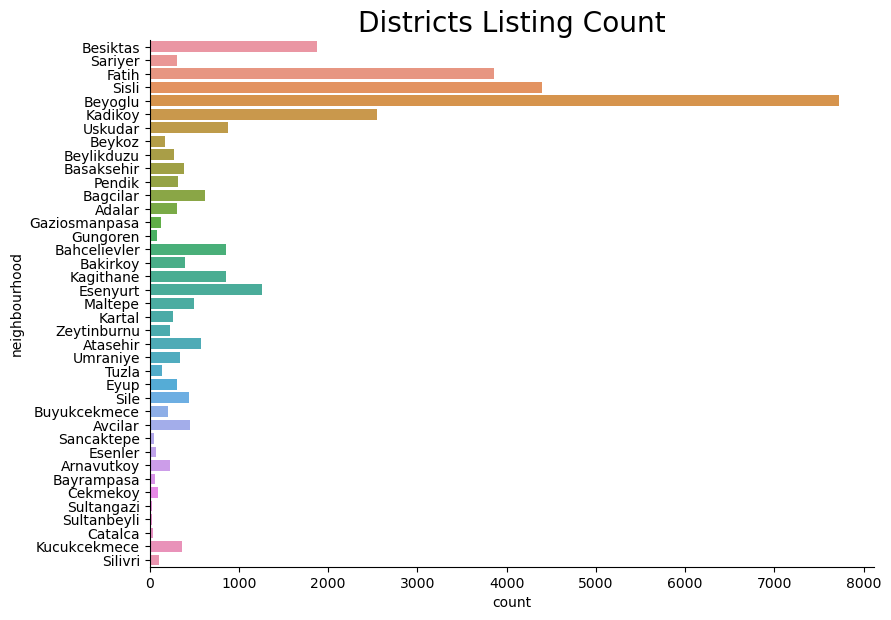

In [23]:
dist_g = sns.catplot(y = 'neighbourhood', kind = 'count', palette = None, height = 6, aspect = 1.5, data = ist_24)
dist_g.savefig('district_count.png', dpi = 800)
plt.style.use('fivethirtyeight')
plt.title('Districts Listing Count')

As we mentioned above the most popular districts in Istanbul are Beyoglu, Sisli, Fatih, Kadikoy and Besiktas and all of them located in the center and close to the touristic places. We can guess that being close to popular places is an important factoor for Airbnb rentals. 

### What is the proportion of districts for each room type?

In [24]:
ist_24.room_type.value_counts()

Entire home/apt    21934
Private room        9160
Shared room          453
Hotel room           211
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room type Count')

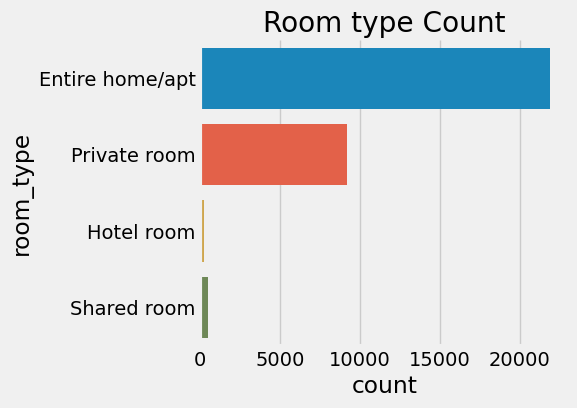

In [25]:
room_type_g = sns.catplot(y = 'room_type', kind = 'count', palette = None, height = 4, aspect = 1.5, data = ist_24);
room_type_g.savefig('room_type.png', dpi = 800)
plt.title('Room type Count')

So we have for room types as listed above and we can clearly see that Entire home/apt is the most rented type.

In [30]:
df = ist_24.groupby(["neighbourhood","room_type"]).size().unstack('room_type', fill_value=0)
df["total_listings"] = df["Hotel room"] + df["Private room"]+df["Entire home/apt"] + df["Shared room"]
df["shared_house_rate"] = ( df["Shared room"] + df["Private room"] ) / (df["Hotel room"] + df["Private room"]+df["Entire home/apt"]+df["Shared room"])
df["hotel_rate"] = ( df["Hotel room"] ) / (df["Hotel room"] + df["Private room"]+df["Entire home/apt"]+df["Shared room"])
df["entire_home_rate"] = ( df["Entire home/apt"] ) / (df["Hotel room"] + df["Private room"]+df["Entire home/apt"]+df["Shared room"])

In [31]:
df1 = df[df.total_listings >= 50].sort_values(by=['entire_home_rate'], ascending = False)
df1.head(10)

room_type,Entire home/apt,Hotel room,Private room,Shared room,total_listings,shared_house_rate,hotel_rate,entire_home_rate
neighbourhood,,,,,,,,
Basaksehir,345,0,35,4,384,0.101562,0.000000,0.898438
Bagcilar,557,0,66,2,625,0.108800,0.000000,0.891200
Silivri,87,1,13,0,101,0.128713,0.009901,0.861386
Beylikduzu,229,0,38,5,272,0.158088,0.000000,0.841912
Zeytinburnu,193,0,34,5,232,0.168103,0.000000,0.831897
Buyukcekmece,173,4,28,3,208,0.149038,0.019231,0.831731
Esenyurt,1027,0,210,19,1256,0.182325,0.000000,0.817675
Bahcelievler,702,0,147,11,860,0.183721,0.000000,0.816279
Beyoglu,5931,52,1650,95,7728,0.225802,0.006729,0.767469


The highest rate for entire home/apt in Basaksehir and Bagcilar

In [32]:
df2= df[df.total_listings >= 50].sort_values(by=["hotel_rate"],ascending=False)
df2.head(10)

room_type,Entire home/apt,Hotel room,Private room,Shared room,total_listings,shared_house_rate,hotel_rate,entire_home_rate
neighbourhood,,,,,,,,
Fatih,2133,111,1567,51,3862,0.418954,0.028742,0.552305
Buyukcekmece,173,4,28,3,208,0.149038,0.019231,0.831731
Silivri,87,1,13,0,101,0.128713,0.009901,0.861386
Adalar,160,3,143,1,307,0.469055,0.009772,0.521173
Gaziosmanpasa,96,1,31,3,131,0.259542,0.007634,0.732824
Kagithane,592,6,247,14,859,0.303842,0.006985,0.689173
Atasehir,355,4,204,15,578,0.378893,0.006920,0.614187
Beyoglu,5931,52,1650,95,7728,0.225802,0.006729,0.767469
Besiktas,1337,6,522,15,1880,0.285638,0.003191,0.711170


Fatih is the most touristic district in Istanbul. Seeing highest hotel rate in this district is not surprising.

In [34]:
df3= df[df.total_listings >= 50].sort_values(by=["shared_house_rate"],ascending=False)
df3.head(10)

room_type,Entire home/apt,Hotel room,Private room,Shared room,total_listings,shared_house_rate,hotel_rate,entire_home_rate
neighbourhood,,,,,,,,
Esenler,21,0,31,20,72,0.708333,0.000000,0.291667
Arnavutkoy,69,0,154,2,225,0.693333,0.000000,0.306667
Kucukcekmece,165,0,178,16,359,0.540390,0.000000,0.459610
Maltepe,243,0,249,8,500,0.514000,0.000000,0.486000
Uskudar,444,1,411,21,877,0.492588,0.001140,0.506271
Pendik,164,0,141,7,312,0.474359,0.000000,0.525641
Adalar,160,3,143,1,307,0.469055,0.009772,0.521173
Beykoz,95,0,78,4,177,0.463277,0.000000,0.536723
Tuzla,74,0,55,5,134,0.447761,0.000000,0.552239


Esenler, Arnavutkoy, Kucukcekmece has the most highest rate for shared_house_rate 

### What are the top districts for review value score?

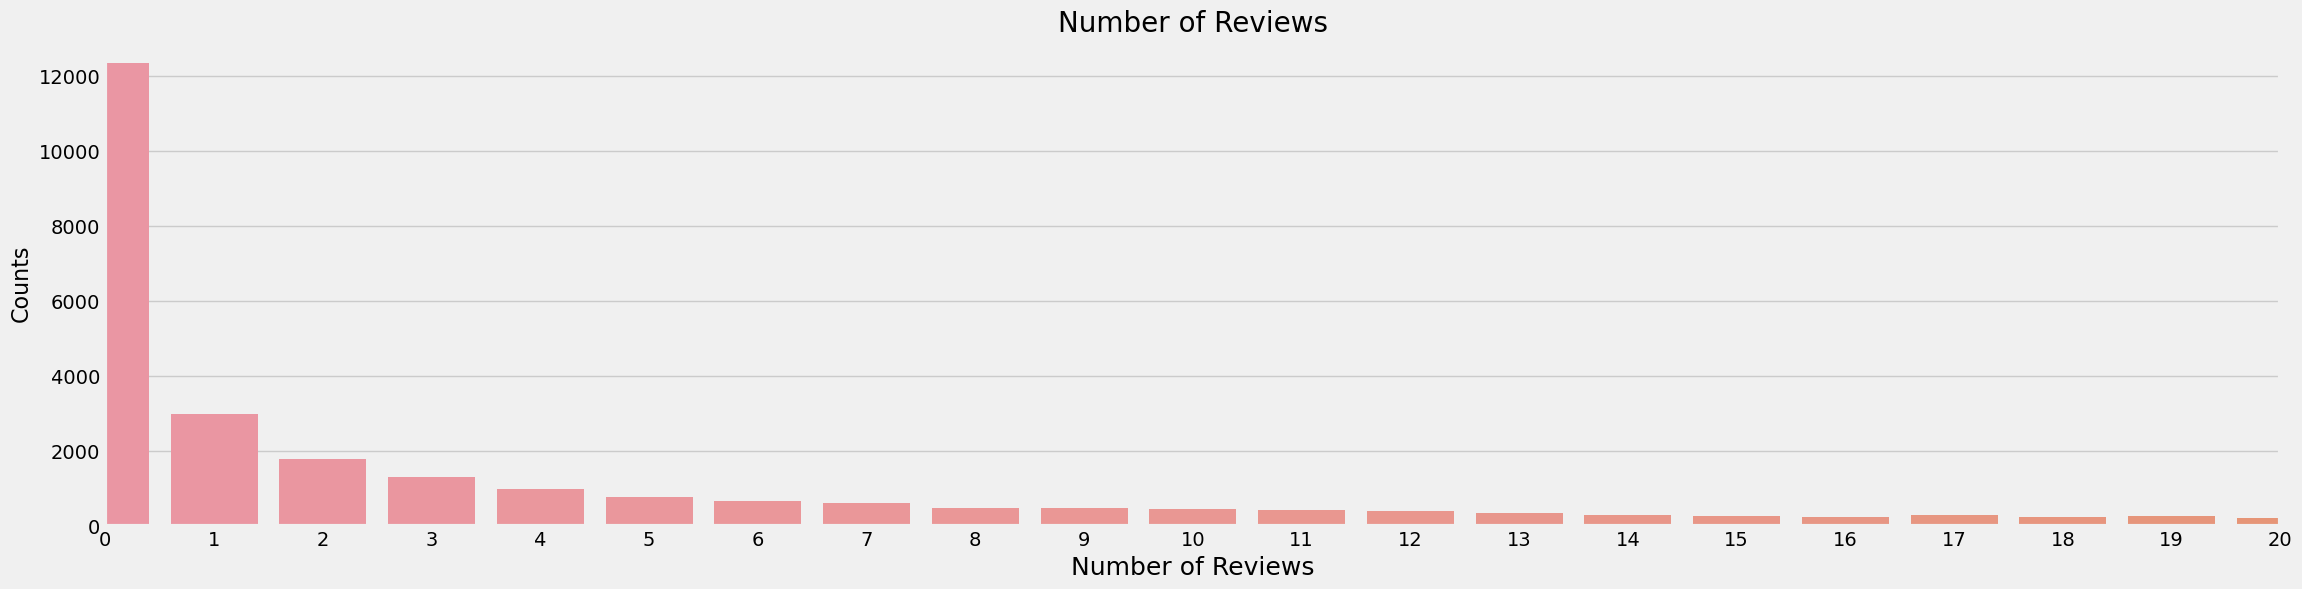

In [39]:
plt.style.use('fivethirtyeight')  
fig = plt.figure(figsize=(25, 6))  

sns.countplot(x=ist_24['number_of_reviews']) 
plt.title('Number of Reviews', fontsize=20)
plt.xlabel('Number of Reviews', fontsize=18)
plt.ylabel('Counts', fontsize=16)
plt.xlim(0, 20)

plt.show() 

Most listings have zero reviews, so we're gonna work with accommodations that have reviews

In [40]:
ist_24[ist_24.review_scores_value.notnull()]['review_scores_value'].describe()

count    19376.000000
mean         4.571157
std          0.654266
min          1.000000
25%          4.500000
50%          4.750000
75%          5.000000
max          5.000000
Name: review_scores_value, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_19068\550043316.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ist_24[(ist_24.review_scores_value.notnull())]['review_scores_value'])


<Axes: xlabel='review_scores_value', ylabel='Density'>

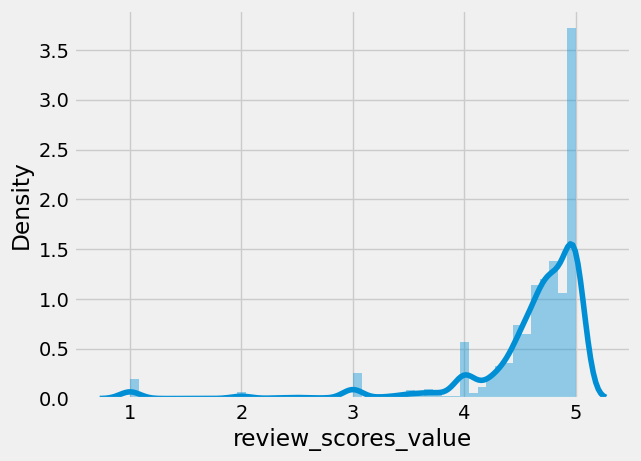

In [41]:
sns.distplot(ist_24[(ist_24.review_scores_value.notnull())]['review_scores_value'])

In [42]:
ist_24[ist_24.review_scores_value.notnull()].groupby("neighbourhood").agg({"review_scores_value": [ "mean","count"]}).reset_index().sort_values(by=[("review_scores_value","mean")],ascending=False).head(15)

neighbourhood review_scores_value      
                                mean count
34    Sultangazi            4.956364    11
33   Sultanbeyli            4.863750     8
15      Cekmekoy            4.795600    25
8     Bayrampasa            4.755294    17
21      Gungoren            4.729070    43
16       Esenler            4.706000    25
22       Kadikoy            4.681538  1781
0         Adalar            4.675877   228
26       Maltepe            4.674516   248
29       Sariyer            4.649153   177
18          Eyup            4.645278   144
37       Uskudar            4.626819   459
23     Kagithane            4.613550   462
11    Beylikduzu            4.611327   113
35         Tuzla            4.608387    62

UskudarThe table shows us that Kadikoy, Uskudar, Kagithane Maltepe have the highest review value score for districts by having more than 50 listings with reviews